# WeatherPy

### Analysis

* In general, temperatures are highest in cities near the equator, and get lower as we move towards the two poles, especially in the north.
* Humidity seems especially high in cities near the equator to about -20 degrees latitude.
* Cloudiness and wind speed don't seem to have a coorelation with latitude.

In [1]:
# Duty free imports
import pandas as pd
import random

import requests as req
import json

import matplotlib.pyplot as plt

from citipy import citipy

In [2]:
# Get apikey
filename = "apikey.txt"

def get_file_contents(filename):
    try:
        with open(filename, "r") as file:
            return file.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)
        
api_key = get_file_contents(filename)

## Generate Cities List & Perform API Calls

I'm generating cities and making API calls at the same time, because some generated cities may not get a successful API call. I'm generating cities untill we've made 500 successful API calls, not just generating 500 cities.

In [3]:
# Make function to get random city
def get_rand_city():
    lat = random.randint(-90, 90)
    lng = random.randint(-180, 180)
    return citipy.nearest_city(lat, lng)

In [4]:
# Set up the lists to record data
unique_list = [] # to prevent duplicates
name_list =[]
temp_list = []
hum_list = []
cloud_list = []
wind_list = []
lat_list = []
lng_list = [] # not needed, for testing only

# Get cities and weather info
while len(name_list) < 500:
    city = get_rand_city()
        
    if city.city_name not in unique_list:
        unique_list.append(city.city_name)
            
        try:
            req_url = "http://api.openweathermap.org/data/2.5/weather?" \
                    "appid=%s&q=%s&units=imperial" % (api_key, city.city_name)
            city_info = req.get(req_url).json()
            name_list.append("%s, %s" % (city_info["name"], city_info["sys"]["country"]))
            temp_list.append(city_info["main"]["temp"])
            hum_list.append(city_info["main"]["humidity"])
            cloud_list.append(city_info["clouds"]["all"])
            wind_list.append(city_info["wind"]["speed"])
            lat_list.append(city_info["coord"]["lat"])
            lng_list.append(city_info["coord"]["lon"])
            print(str(len(name_list)) + ": " + city_info["name"])
            
        except:
            pass


1: Avarua
2: Ribeira Grande
3: Matelica
4: Valvedditturai
5: Saldanha
6: Gat
7: Krasnoarmeysk
8: Tiksi
9: Gamba
10: Albany
11: Atuona
12: Hithadhoo
13: Araioses
14: Goderich
15: Sorland
16: Kapaa
17: Santa Cruz del Sur
18: Muros
19: Klaksvik
20: Saint Anthony
21: Bonga
22: Hilo
23: Lorengau
24: Barrow
25: Tuktoyaktuk
26: Jamestown
27: Cape Town
28: Nabire
29: Kingsport
30: Ushuaia
31: Hobart
32: Punta Arenas
33: Cabo San Lucas
34: East London
35: Gillette
36: Hermanus
37: Kodiak
38: Bluff
39: Tukums
40: Mataura
41: Thompson
42: Puerto Ayora
43: Bredasdorp
44: Storforshei
45: Katsuura
46: Busselton
47: Luderitz
48: Menongue
49: Broome
50: Seddon
51: Qujing
52: Faanui
53: Lagoa
54: Zhigalovo
55: Mitchell
56: Paamiut
57: New Norfolk
58: Mahibadhoo
59: Mehamn
60: Port Elizabeth
61: Kirakira
62: Abdanan
63: Rikitea
64: Carpentras
65: Kruisfontein
66: Mar del Plata
67: Butaritari
68: Jalu
69: Yellowknife
70: Carnarvon
71: Georgetown
72: Grand Gaube
73: Vaini
74: Galveston
75: Maltahohe
76: S

In [17]:
# Make the dataframe
weather_df = pd.DataFrame({
    "City": name_list,
    "Temperature": temp_list,
    "Humidity": hum_list,
    "Cloudiness": cloud_list,
    "Wind Speed": wind_list,
    "Latitude": lat_list,
    "Longitude": lng_list
})

# Export it to CSV
weather_df.to_csv("weather_data.csv")

# Visually inspect dataframe
weather_df.head()

,City,Cloudiness,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,"Avarua, CK",40,73,-21.21,-159.78,75.20,3.36
1,"Ribeira Grande, PT",64,99,38.52,-28.70,64.81,14.90
2,"Matelica, IT",0,100,43.26,13.01,29.43,2.24
3,"Valvedditturai, LK",0,92,9.82,80.17,81.46,14.12
4,"Saldanha, PT",0,87,41.42,-6.55,20.26,2.59


In [7]:
# Check to make sure that there are 500 unique cities here
weather_df["City"].nunique()

500

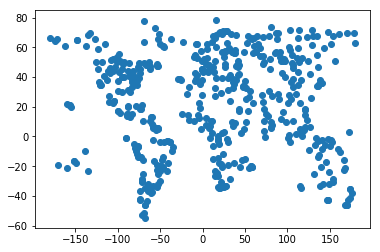

In [6]:
# Test the locations to see if we've covered everywhere
plt.scatter(lng_list, lat_list)
plt.show()

## Latitude vs Temperature Plot

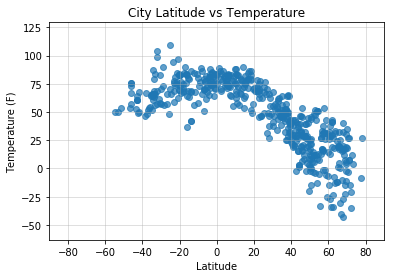

In [28]:
# Make the Temperature vs Latitude plot
# Make figure for saving
fig = plt.figure()

# Plot the data
plt.scatter(weather_df.Latitude, weather_df.Temperature, alpha=0.7)

# Present the axes
plt.grid(alpha=0.5)
plt.xlim(-90, 90)
plt.ylim(min(weather_df.Temperature)-20, max(weather_df.Temperature)+20)

# Title & label
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the image
fig.savefig("lat_v_temp.png")

# Show it
plt.show()

## Latitude vs Humidity Plot

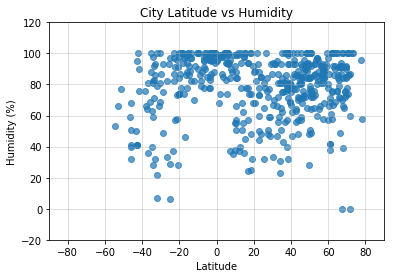

In [29]:
# Make the Humidity vs Latitude plot
# Make figure for saving
fig = plt.figure()

# Plot the data
plt.scatter(weather_df.Latitude, weather_df.Humidity, alpha=0.7)

# Present the axes
plt.grid(alpha=0.5)
plt.xlim(-90, 90)
plt.ylim(min(weather_df.Humidity)-20, max(weather_df.Humidity)+20)

# Title & label
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the image
fig.savefig("lat_v_hum.png")

# Show it
plt.show()

## Latitude vs Cloudiness Plot

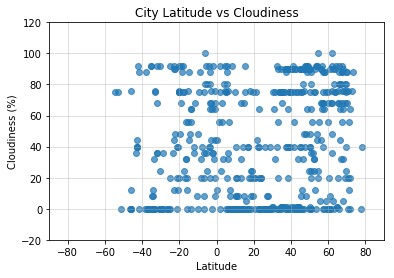

In [30]:
# Make the Cloudiness vs Latitude plot
# Make figure for saving
fig = plt.figure()

# Plot the data
plt.scatter(weather_df.Latitude, weather_df.Cloudiness, alpha=0.7)

# Present the axes
plt.grid(alpha=0.5)
plt.xlim(-90, 90)
plt.ylim(min(weather_df.Cloudiness)-20, max(weather_df.Cloudiness)+20)

# Title & label
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the image
fig.savefig("lat_v_cloud.png")

# Show it
plt.show()

## Latitude vs Wind Speed Plot

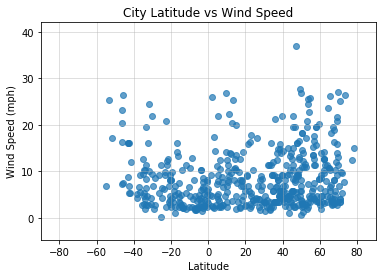

In [33]:
# Make the Wind Speed vs Latitude plot
# Make figure for saving
fig = plt.figure()

# Plot the data
plt.scatter(weather_df.Latitude, weather_df["Wind Speed"], alpha=0.7)

# Present the axes
plt.grid(alpha=0.5)
plt.xlim(-90, 90)
plt.ylim(min(weather_df["Wind Speed"])-5, max(weather_df["Wind Speed"])+5)

# Title & label
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the image
fig.savefig("lat_v_wind.png")

# Show it
plt.show()